**Introducción:**

*En la actualidad, retener a los clientes es un desafío crítico para las empresas en todos los sectores. 
La competencia feroz y la facilidad con la que los clientes pueden cambiar de proveedor hacen que sea imperativo para 
las empresas identificar y retener a los clientes más valiosos. En este sentido, las predicciones de pérdida de clientes desempeñan un papel crucial al 
proporcionar información valiosa sobre los que están en riesgo de abandonar el negocio. En esta introducción, exploraremos por qué y cómo estas predicciones pueden ser de gran ayuda para las empresas.*

**Importancia de las predicciones de abandono:**

*El churn, o la pérdida de clientes, es costoso para las empresas en términos de ingresos perdidos, recursos dedicados a adquisición de clientes y 
reputación de marca. Identificar a los clientes que están en riesgo de abandonar el negocio permite a las empresas tomar medidas proactivas para retenerlos, lo que puede incluir ofrecer incentivos, 
mejorar la experiencia o personalizar las ofertas para satisfacer mejor sus necesidades.*

**Cómo ayudan las predicciones de abandono:**

- Anticipación de Problemas: *Las predicciones de pérdida de clientes permiten a las empresas anticipar problemas potenciales y abordarlos antes de que sea demasiado tarde. Al identificar las señales 
tempranas de insatisfacción o desinterés, estas pueden intervenir de manera proactiva y resolver los problemas antes de que afecten la relación con el cliente.*

- Optimización de Recursos: *Al enfocar los recursos en los clientes que están en mayor riesgo de abandonar el negocio, las empresas pueden optimizar sus esfuerzos de retención y maximizar el retorno de la inversión.*

- Mejora de la Experiencia del Cliente: *Las predicciones de pérdida de clientes también pueden ayudar a las empresas al identificar áreas de mejora en productos, servicios o procesos. Al abordar estos problemas, las empresas pueden aumentar la satisfacción del cliente y reducir la probabilidad de fuga.*

<div style="text-align:center;">
    <img src="img\introduccion_imagen_churn.jpg" alt="Texto alternativo" width=500px >
</div>

### *Importamos librerías*

In [1]:
### Manipulación de Datos
import pandas as pd
import numpy as np

### Visualización de Datos
import seaborn as sns
import matplotlib.pyplot as plt

### Tratamiento de datos
from utils.funciones import CategoricalAnalysis, extended_describe, BaseLine

### Machine Learning

# Preparación de datos 
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import  RandomForestClassifier,  GradientBoostingClassifier, VotingClassifier,  AdaBoostClassifier, StackingClassifier, HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Métricas
from sklearn.metrics import  classification_report, confusion_matrix,  precision_score, roc_curve, roc_auc_score,  make_scorer
from sklearn.model_selection import GridSearchCV

# Guardado de modelos
import pickle

# Ignorar warnings
import warnings
warnings.filterwarnings('ignore')


### *Importamos datos*

In [2]:
df = pd.read_csv('./data/processed/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


> La tabla provee información sobre los datos para entender mejor nuestro análisis, dónde cada fila representa un cliente único.

| Columna         | Descripción                                                                                      |
|-----------------|--------------------------------------------------------------------------------------------------|
| RowNumber       | Un identificador secuencial para cada fila en el conjunto de datos.                              |
| CustomerId      | Identificador único para cada cliente.                                                           |
| Surname         | Apellido del cliente.                                                                            |
| CreditScore     | Representación numérica del puntaje crediticio del cliente.                                      |
| Geography       | La ubicación geográfica del cliente.                                                             |
| Gender          | El género del cliente (Masculino o Femenino).                                       |
| Age             | La edad del cliente.                                                                             |
| Tenure          | El número de años que el cliente ha estado con el banco.                                          |
| Balance         | El saldo de la cuenta del cliente.                                                               |
| NumOfProducts   | El número de productos financieros que utiliza el cliente.                                        |
| HasCrCard       | Indicador binario de si el cliente tiene una tarjeta de crédito (1 para Sí, 0 para No).           |
| IsActiveMember  | Indicador binario de si el cliente es un socio activo (1 para Sí, 0 para No).                    |
| EstimatedSalary | El salario anual estimado del cliente.                                                           |
| Exited          | Indicador binario de abandono del cliente, también conocido como Variable Objetivo (1 para Sí, 0 para No). |


In [3]:
print(f'La base de datos a analizar posee {df.shape[0]} filas y {df.shape[1]} columnas')
print(f'\nLas features que tenemos son: {list(df.columns[:-1])}')
print(f'\nNuestra variable objectivo es: {df.columns[-1]}')

La base de datos a analizar posee 10000 filas y 14 columnas

Las features que tenemos son: ['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

Nuestra variable objectivo es: Exited


### *Primera exploración*

In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.describe(include='object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


- Notamos que la target *Exited* se encuentra desbalanceada gracias al  método describe().
- Poseemos varias features constantes o de poca relevancia como RowNumber -  CustomerId - Surname.
- No tenemos valores nulos. 
- Nuestras Features se encuentran en distintas escalas.

### *Análisis exploratorio de datos*

#### Análisis univariante

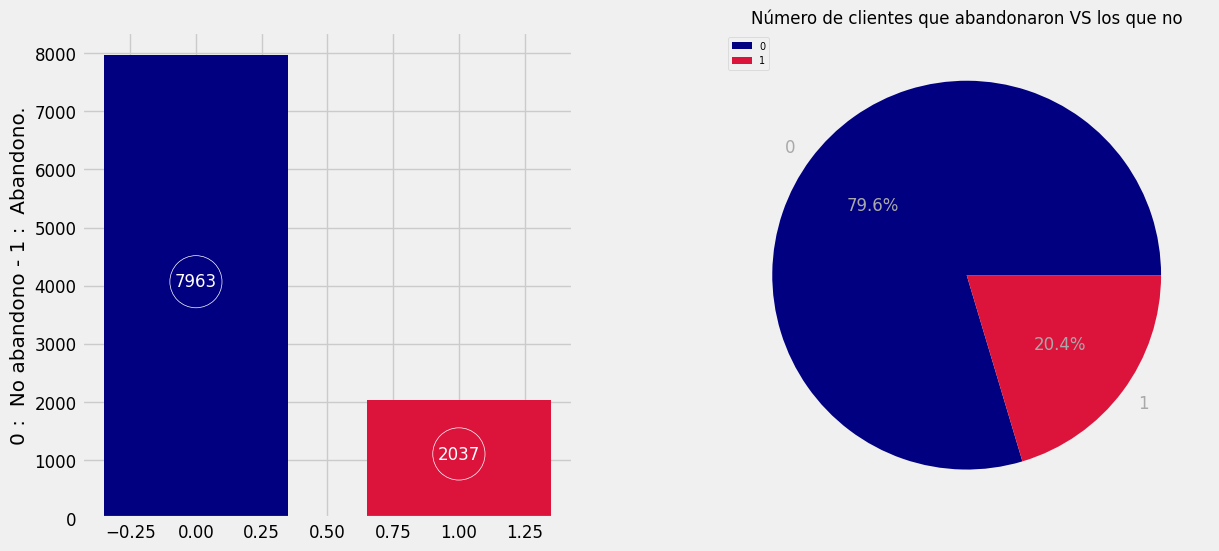

In [9]:
# ¿Cuántos clientes han abandonado el banco (Exited) en comparación con los que no lo han hecho?
categorical_analyzer = CategoricalAnalysis(df=df)
categorical_analyzer.plot_top_categories(title= 'Número de clientes que abandonaron VS los que no', labely='0 :  No abandono - 1 :  Abandono.', column_name='Exited')

- Confirmamos que nuestra target se encuentra desbalanceada por lo que se deberán de aplicar los métodos correspondientes como por ejemplo : SMOTE, class_weight, ETC

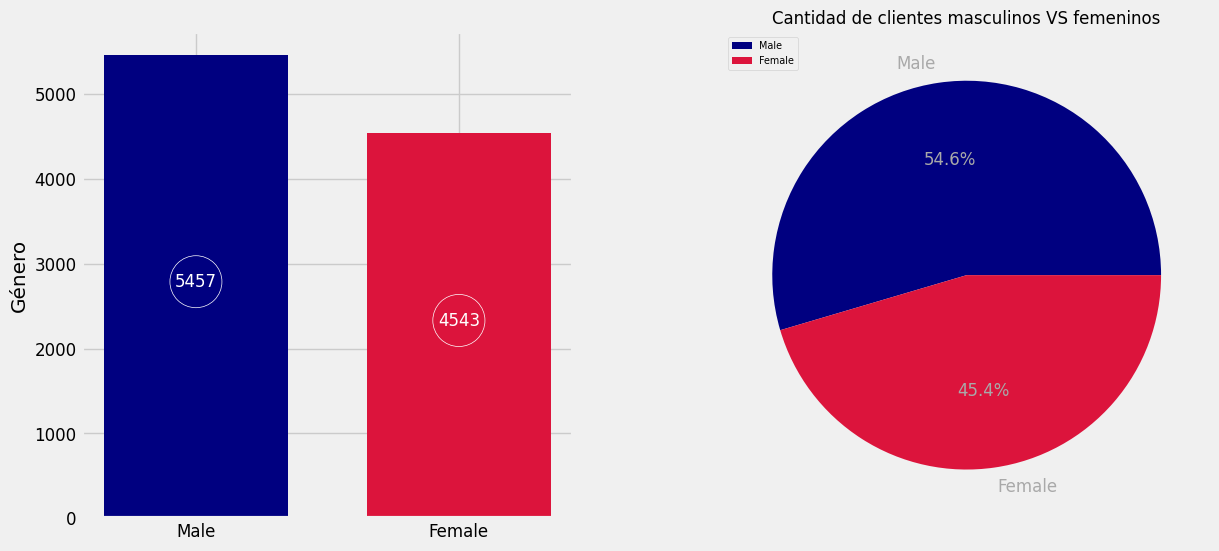

In [10]:
# ¿Cuántos clientes tenemos de cada género?
categorical_analyzer.plot_top_categories(title='Cantidad de clientes masculinos VS femeninos', labely='Género', column_name='Gender')

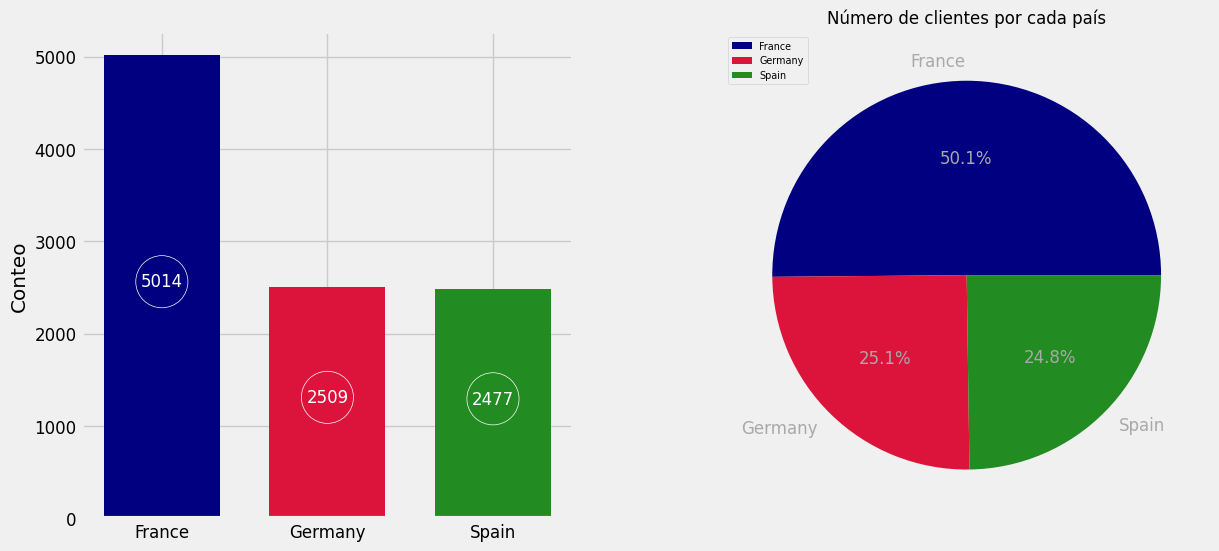

In [11]:
# ¿Cuántos clientes tenemos en cada país (Geography)?
categorical_analyzer.plot_top_categories(title='Número de clientes por cada país', labely='Conteo', column_name='Geography')

- Ubicación Geográfica de nuestros clientes: Solo poseemos datos pertenecientes a tres países en general, donde la mayoría es Francesa con 5014, siguiendo Alemania y luego España con una diferencia mínima respecto al anterior.

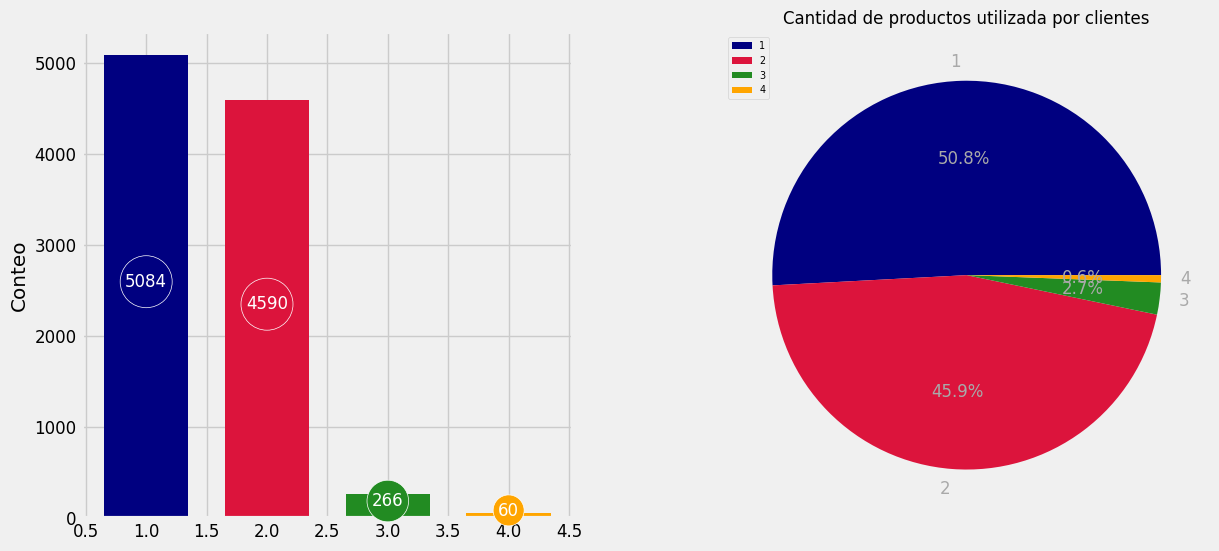

In [12]:
# ¿Cuántos productos financieros (NumOfProducts) usa cada cliente en promedio?
categorical_analyzer.plot_top_categories(title='Cantidad de productos utilizada por clientes', labely='Conteo', column_name='NumOfProducts')

- Este atributo puede indicar el nivel de compromiso del cliente con el banco y su relación con la probabilidad de fuga. 

Una pregunta a hacernos sería *¿ A mayor número de productos menor la probabilidad de fuga? o ¿Representa un papel importante esta Variable respecto a nuestra Target?*

In [13]:
result = df.groupby('Exited')[['NumOfProducts']].value_counts() / len(df) * 100
result_df = result.reset_index(name='Percentage')
result_df.set_index('Exited').T

Exited,0,0,0,1,1,1,1
NumOfProducts,2.00,1.00,3.00,1.00,2.00,3.0,4.0
Percentage,42.42,36.75,0.46,14.09,3.48,2.2,0.6


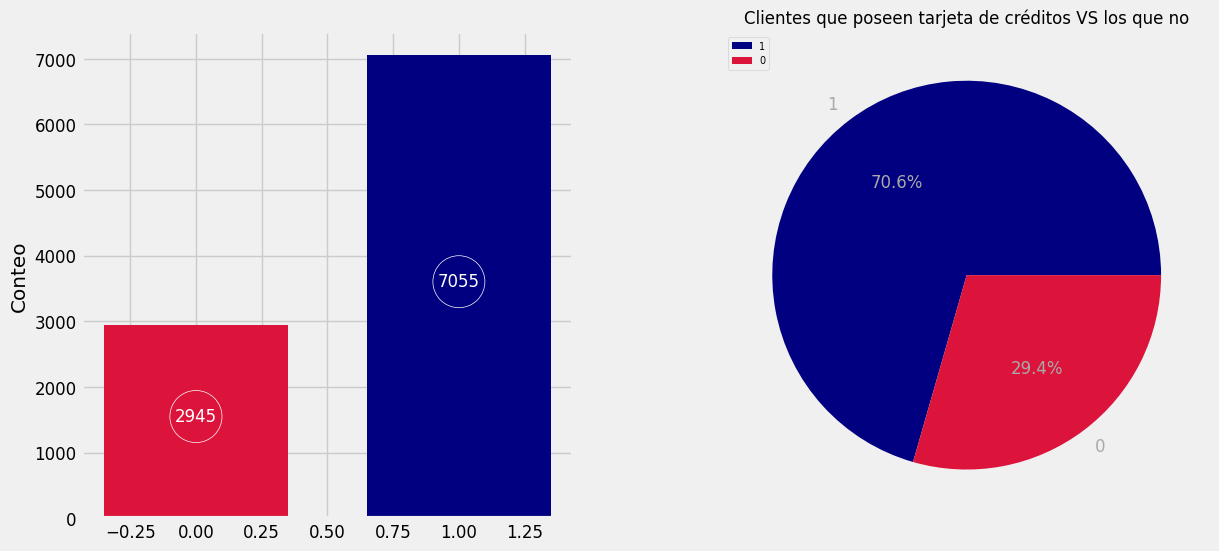

In [14]:
# ¿Cuántos clientes tienen tarjeta de crédito (HasCrCard)? -> La gran mayoría
categorical_analyzer.plot_top_categories(title='Clientes que poseen tarjeta de créditos VS los que no', labely='Conteo', column_name='HasCrCard')

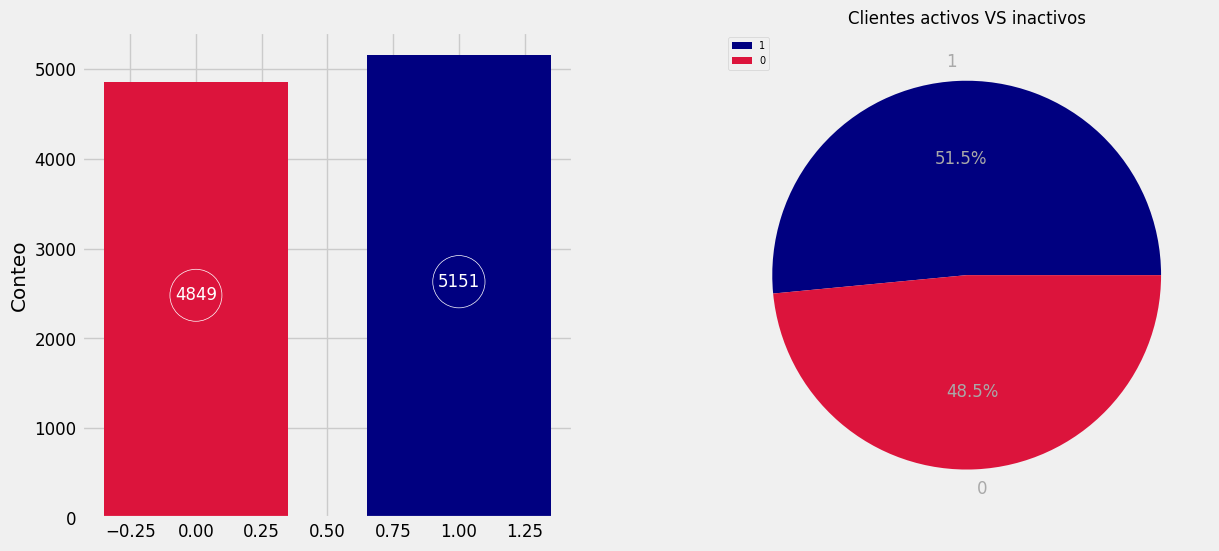

In [15]:
categorical_analyzer.plot_top_categories(title='Clientes activos VS inactivos', labely='Conteo', column_name='IsActiveMember')

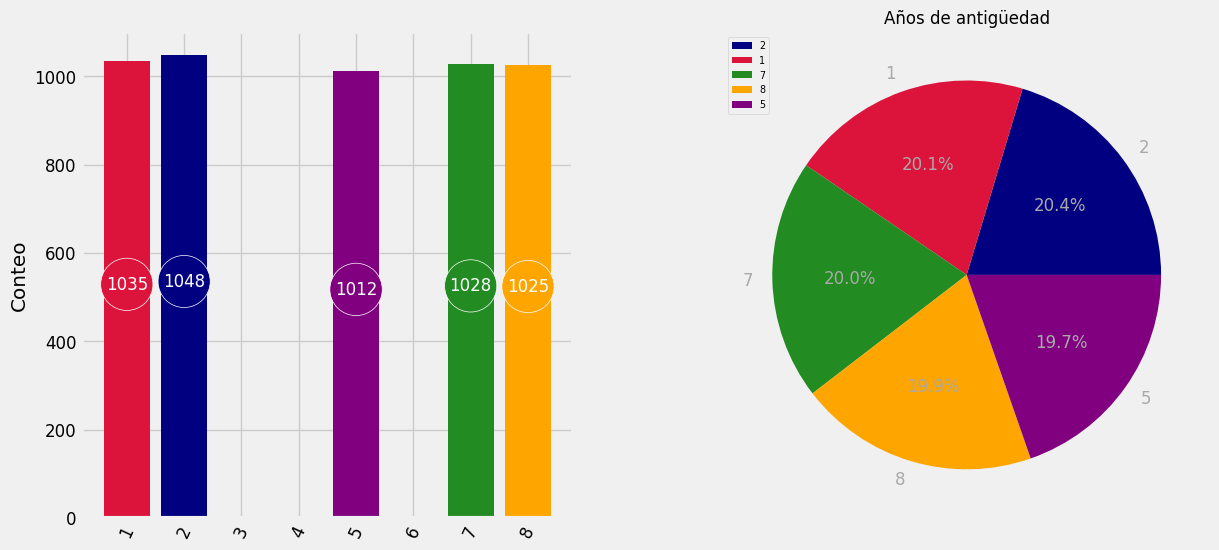

In [16]:
# ¿Como varía la antigüedad (Tenure) de los clientes en el banco?
categorical_analyzer.plot_top_categories(title='Años de antigüedad', labely='Conteo', column_name='Tenure')

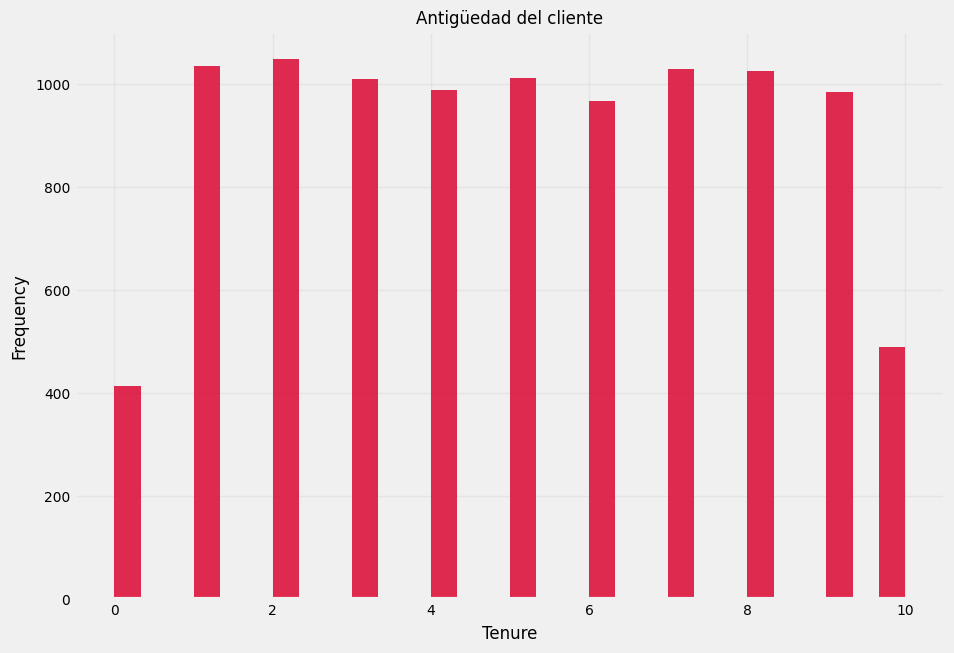

La distribución es platicúrtica con una curtosis de -1.17. Los datos se encuentran dispersos.
La distribución se encuentra sesgada hacia la izquierda 0.01.


,count,mean,median,mode,std,min,25%,50%,75%,max,kurtosis,skewness
Tenure,10000.0,5.0128,5.0,2,2.89,0.0,3.0,5.0,7.0,10.0,-1.17,0.01


In [18]:
# ¿Cuál es la distribución de la antigüedad (Tenure) de los clientes en el banco?
numeric_analyzer = CategoricalAnalysis(df=df)
numeric_analyzer.plot_distribution(title= 'Antigüedad del cliente', column_name='Tenure', cant_bins = 30, color='crimson', rotation=0, alpha=0.9)
extended_describe('Tenure', df)

- La media y la mediana son casi idénticas, lo que sugiere que el primer pensamiento es que los datos poseen una distribución simétrica o casi simétrica.
- La desviación estándar es relativamente alta en comparación con la media, lo que indica que los datos tienen una dispersión considerable.
- La curtosis negativa y la asimetría cercana a cero indican que la distribución es relativamente plana y simétrica, pero con cierta dispersión y una forma un tanto atípica.

En resumen, aunque los datos presentes tienen una distribución simétrica y las medidas centrales son similares, la alta desviación estándar y la curtosis negativa sugieren que los datos pueden **no seguir una distribución normal estándar**. 

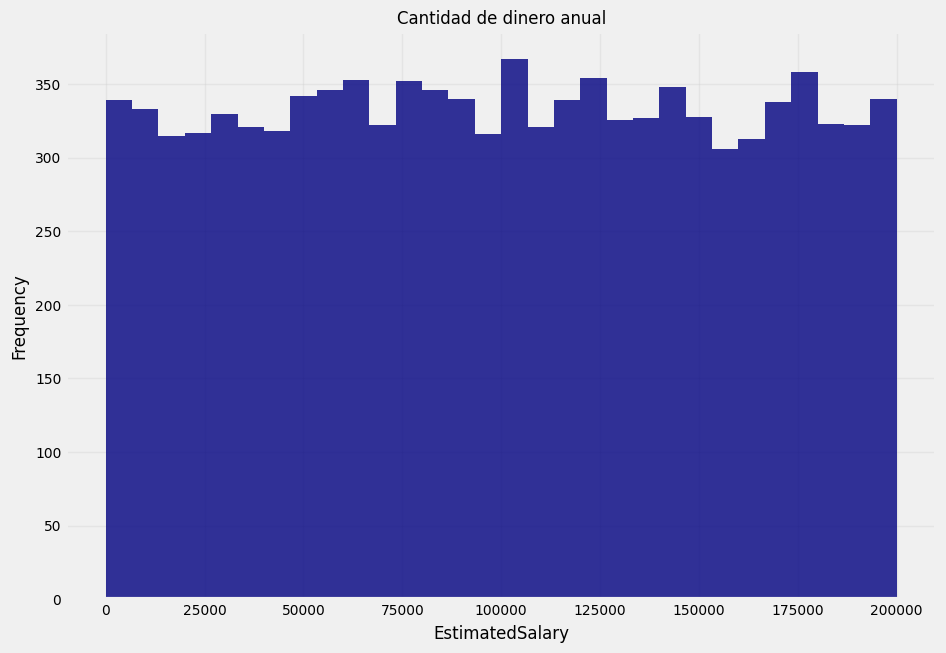

La distribución es platicúrtica con una curtosis de -1.18. Los datos se encuentran dispersos.
La distribución se encuentra sesgada hacia la izquierda 0.0.


,count,mean,median,mode,std,min,25%,50%,75%,max,kurtosis,skewness
EstimatedSalary,10000.0,100090.239881,100193.915,24924.92,57510.49,11.58,51002.11,100193.915,149388.2475,199992.48,-1.18,0.0


In [19]:
numeric_analyzer.plot_distribution(title='Cantidad de dinero anual', column_name='EstimatedSalary', cant_bins = 30, color='navy', rotation=0, alpha=0.8)
extended_describe('EstimatedSalary', df)

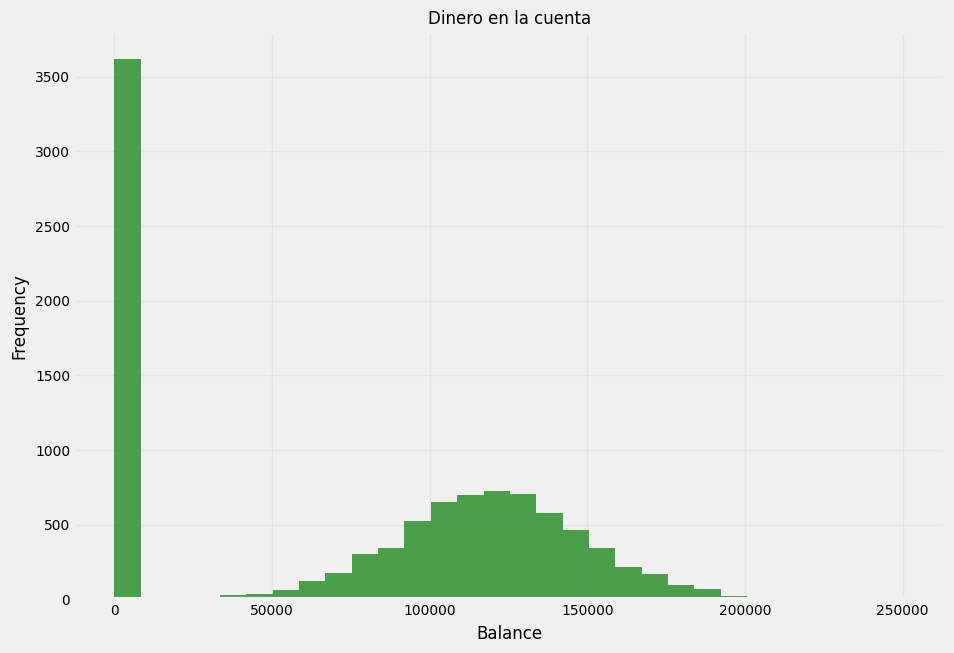

La distribución es platicúrtica con una curtosis de -1.49. Los datos se encuentran dispersos.
La distribución se encuentra sesgada hacia la derecha -0.14.


,count,mean,median,mode,std,min,25%,50%,75%,max,kurtosis,skewness
Balance,10000.0,76485.889288,97198.54,0.0,62397.41,0.0,0.0,97198.54,127644.24,250898.09,-1.49,-0.14


In [20]:
numeric_analyzer.plot_distribution(title='Dinero en la cuenta', column_name='Balance', cant_bins = 30, color='forestgreen', rotation=0, alpha=0.8)
extended_describe('Balance', df)

- ¿Existe una relación entre el Balance y la probabilidad de fuga por parte de nuestros clientes?

In [21]:
result_2 = df.groupby('Exited')[['Balance']].value_counts()/len(df)*100
result_df_2 = result_2.reset_index(name='Porcentaje')
result_df_2.sort_values(by='Porcentaje', ascending=False)

,Exited,Balance,Porcentaje
0,0,0.00,31.17
4846,1,0.00,5.00
1,0,130170.82,0.02
3195,0,131778.66,0.01
4265,0,154712.58,0.01
...,...,...,...
2125,0,114655.58,0.01
2124,0,114631.23,0.01
2123,0,114628.40,0.01
2122,0,114609.55,0.01


- Podemos notar que no estabamos del todo equivocados, pero solo es una parte mínima, donde el Balance equivale a cero estos clientes toman la iniciativa de irse.

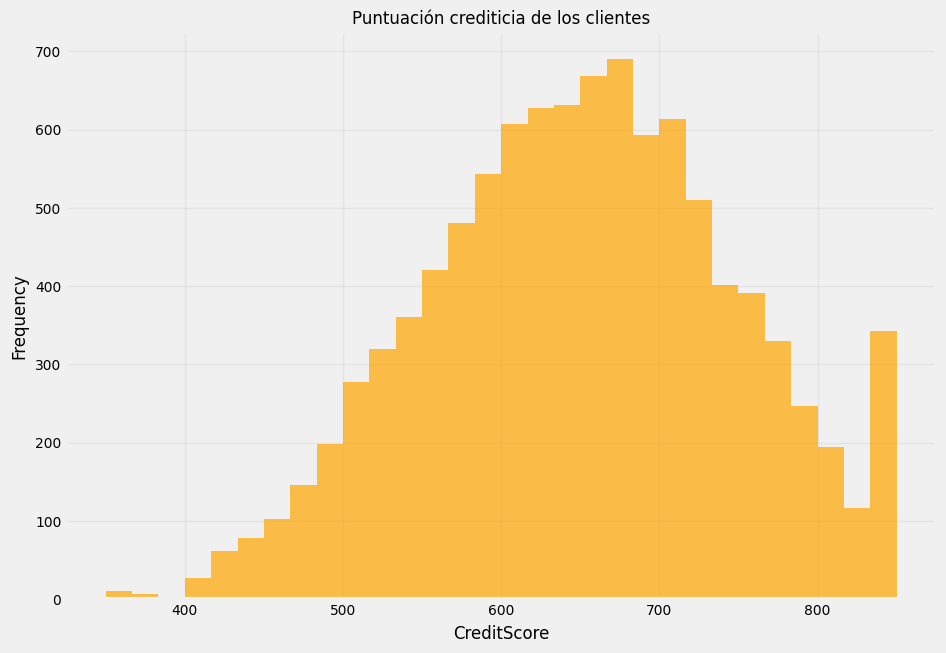

La distribución es platicúrtica con una curtosis de -0.43. Los datos se encuentran dispersos.
La distribución se encuentra sesgada hacia la derecha -0.07.


,count,mean,median,mode,std,min,25%,50%,75%,max,kurtosis,skewness
CreditScore,10000.0,650.5288,652.0,850,96.65,350.0,584.0,652.0,718.0,850.0,-0.43,-0.07


In [22]:
numeric_analyzer.plot_distribution(title='Puntuación crediticia de los clientes', column_name='CreditScore', cant_bins = 30, color='orange', rotation=0, alpha=0.7)
extended_describe('CreditScore', df)

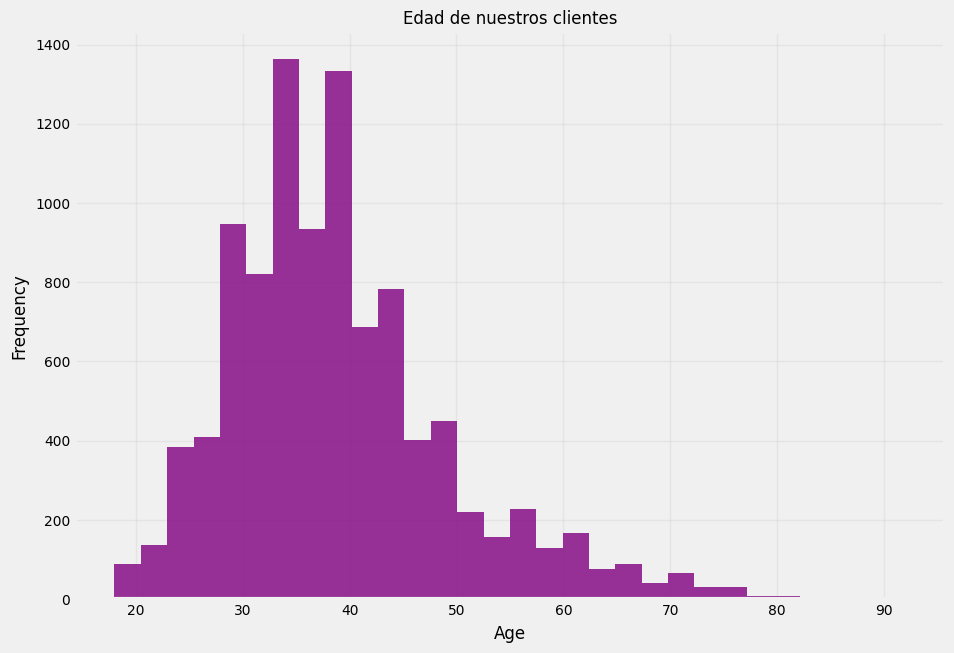

La distribución es leptocúrtica con una curtosis de 1.39. Los datos se encuentran concentrados alrededor de la media.
La distribución se encuentra sesgada hacia la izquierda 1.01.


,count,mean,median,mode,std,min,25%,50%,75%,max,kurtosis,skewness
Age,10000.0,38.9218,37.0,37,10.49,18.0,32.0,37.0,44.0,92.0,1.39,1.01


In [23]:
numeric_analyzer.plot_distribution(title='Edad de nuestros clientes', column_name='Age', cant_bins = 30, color='purple', rotation=0, alpha=0.8)
extended_describe('Age', df)

#### Análisis bivariante

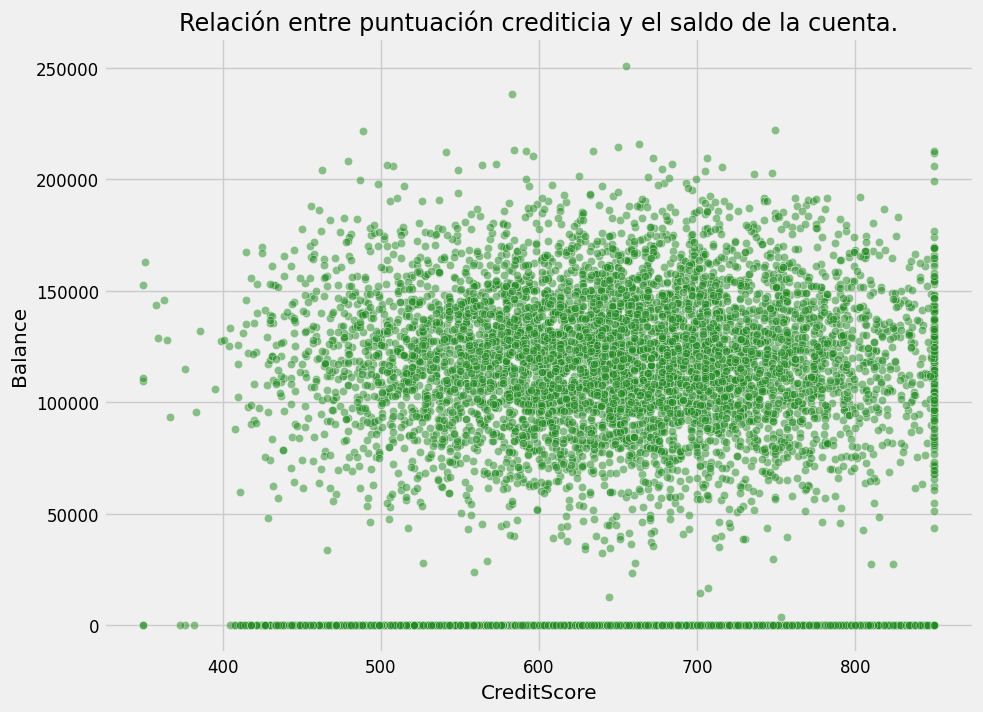

Coeficiente de correlación de Pearson: 0.006268381616008721


In [24]:
# ¿Hay alguna relación entre la puntuación crediticia y el saldo de la cuenta?
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(10,7))
    plt.rcParams.update({'font.size': 12})
    sns.scatterplot(data = df, x='CreditScore', y='Balance', color='forestgreen', alpha=0.5)
    plt.tight_layout()
    plt.title('Relación entre puntuación crediticia y el saldo de la cuenta.')
    plt.show()
    
correlation = df['CreditScore'].corr(df['Balance'], method='pearson')
print("Coeficiente de correlación de Pearson:", correlation)

- Según la métrica de pearson la puntuación crediticia no presenta una alta correlación con el saldo de la cuenta.

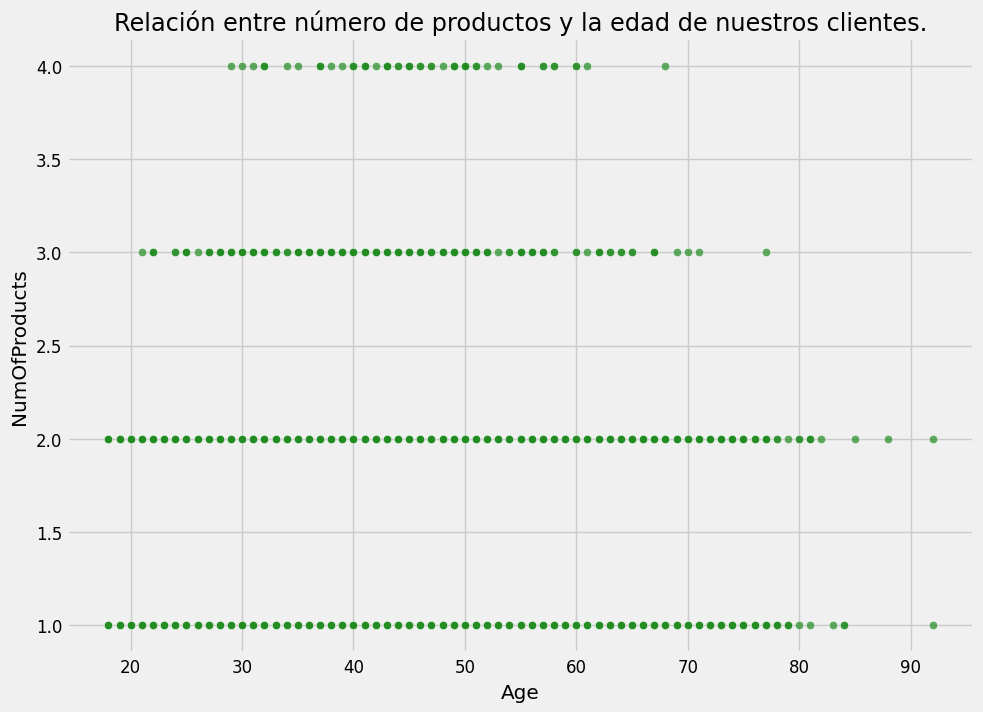

Coeficiente de correlación de Pearson: -0.030680087961508527


In [25]:
# ¿Existe alguna correlación entre la edad y la cantidad de productos financieros que utiliza un cliente?   
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(10,7))
    plt.rcParams.update({'font.size': 12})
    sns.scatterplot(data = df, x='Age', y='NumOfProducts', color='forestgreen', alpha=0.7)
    plt.tight_layout()
    plt.title('Relación entre número de productos y la edad de nuestros clientes.')
    plt.show()
    
correlation = df['Age'].corr(df['NumOfProducts'], method='pearson')
print("Coeficiente de correlación de Pearson:", correlation)

- Podemos observar que a medida que los clientes poseen más productos, el rango de edades se reduce. Sin embargo, no se evidencia una correlación significativa entre la edad y los servicios bancarios ofrecidos. Además, es interesante notar que el rango de edad para clientes con un solo producto es más amplio, abarcando desde los mínimos hasta los máximos, mientras que para aquellos con cuatro productos, este rango se sitúa aproximadamente entre los 30 y los 65 años.

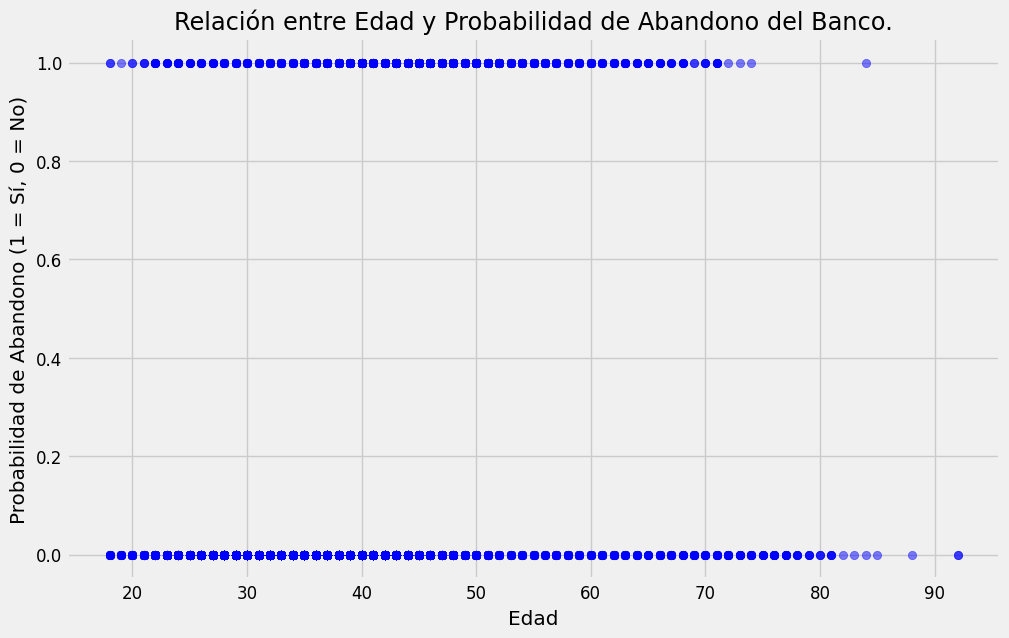

In [26]:
# ¿Hay alguna relación entre la edad y la probabilidad de abandono del banco?
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(10, 6))
    plt.rcParams.update({'font.size': 12})
    plt.scatter(df['Age'], df['Exited'], color='blue', alpha=0.5)
    plt.tight_layout()
    plt.title('Relación entre Edad y Probabilidad de Abandono del Banco.')
    plt.xlabel('Edad')
    plt.ylabel('Probabilidad de Abandono (1 = Sí, 0 = No)')
    plt.show()


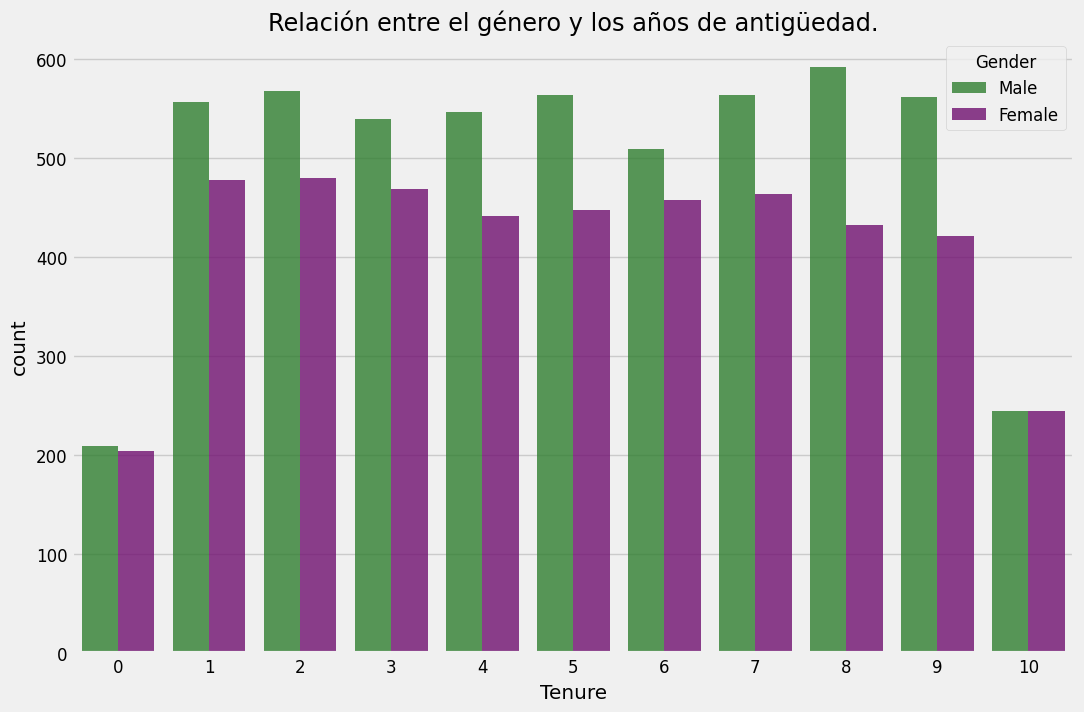

In [27]:
# ¿Cómo varía la antigüedad en el banco según el género?
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(11,7))
    plt.rcParams.update({'font.size': 12})
    sns.countplot(data = df, hue='Gender', x='Tenure', palette=['forestgreen', 'purple'], alpha=0.8)
    plt.tight_layout()
    plt.title('Relación entre el género y los años de antigüedad.')
    plt.show()

- La cantidad masculina siempre va a ser mayor al pasar los años, excepto a los diez donde vemos que estos son exactos. 

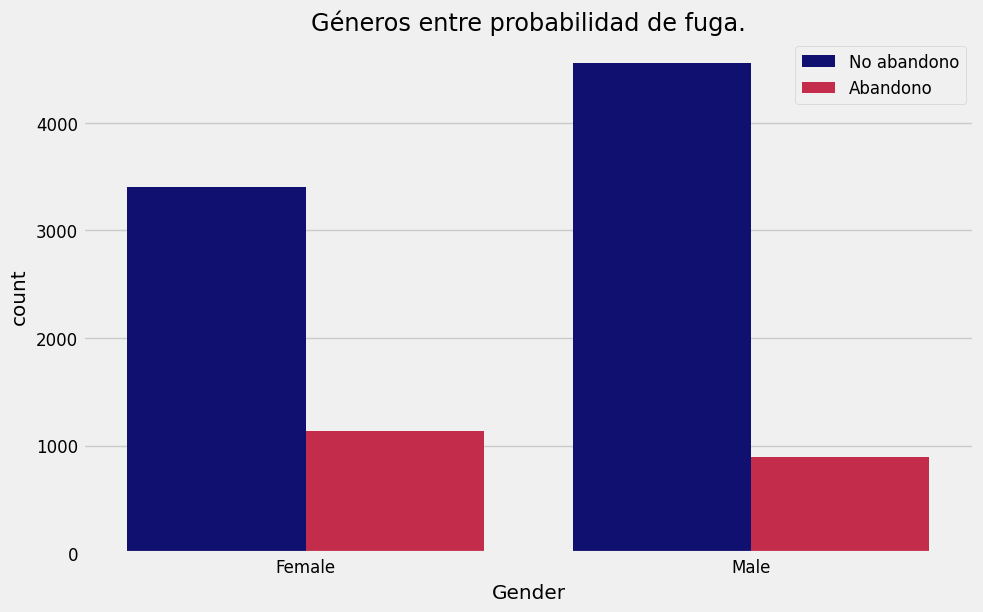

In [28]:
# ¿Existe alguna diferencia en la distribución de género entre clientes que han abandonado el banco y los que no?
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(10, 6))
    plt.rcParams.update({'font.size': 12})
    sns.countplot(data=df, x='Gender', hue='Exited', palette=['navy', 'crimson'] )
    plt.legend(['No abandono', 'Abandono'])
    plt.tight_layout()
    plt.title('Géneros entre probabilidad de fuga.')
    plt.show()

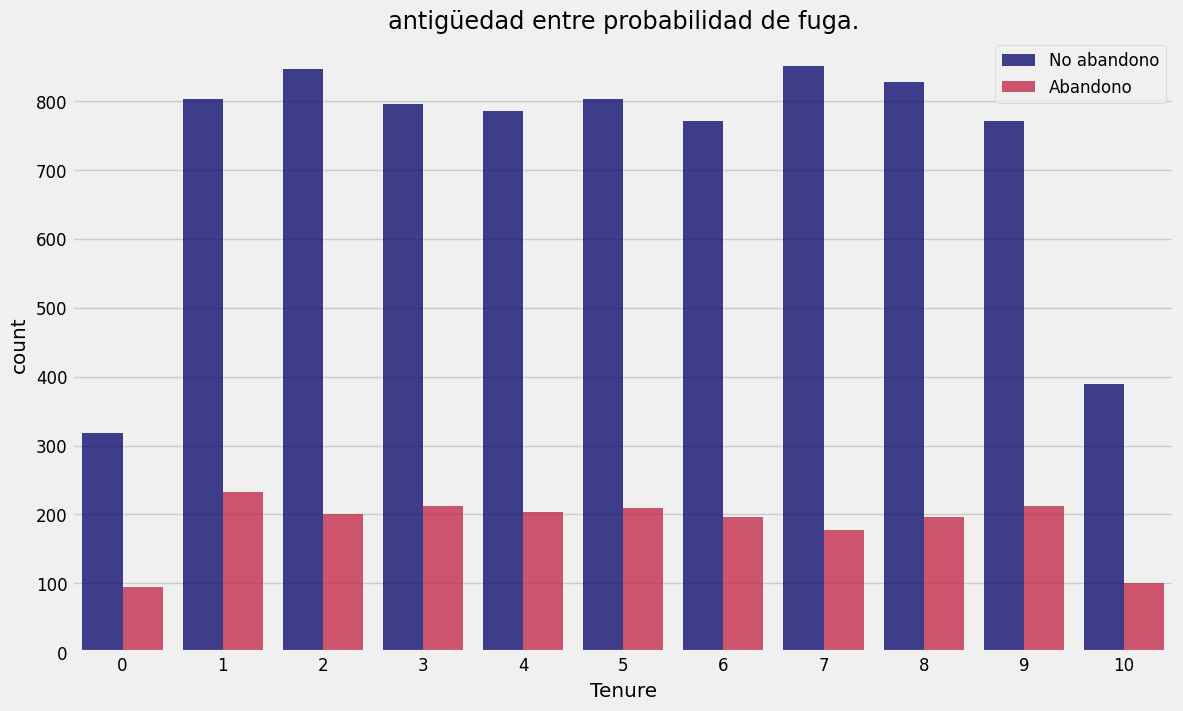

In [29]:
# ¿Cómo se distribuye la antigüedad en el banco entre clientes que han abandonado y los que no?
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(12, 7))
    plt.rcParams.update({'font.size': 12})
    sns.countplot(data=df, x='Tenure', hue='Exited', palette=['navy', 'crimson'], alpha=0.8)
    plt.legend(['No abandono', 'Abandono'])
    plt.tight_layout()
    plt.title('antigüedad entre probabilidad de fuga.')
    plt.show()

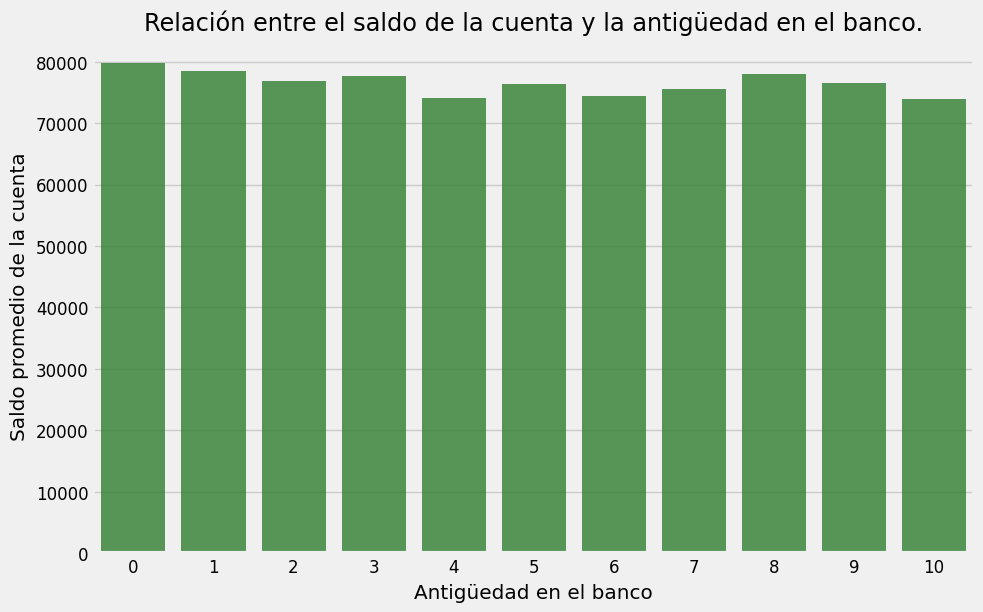

Tenure,0,1,2,3,4,5,6,7,8,9,10
Balance,79878.91063,78555.384222,76839.626469,77668.059881,74059.394065,76444.28086,74403.942637,75551.634426,77936.598254,76562.544014,73927.504


In [30]:
# Calcular la media del saldo de la cuenta para cada valor único de antigüedad en el banco
grupo_por_antiguedad = df.groupby('Tenure')[['Balance']].mean().reset_index()

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(10, 6))
    plt.rcParams.update({'font.size': 12})
    sns.barplot(data = grupo_por_antiguedad, x = 'Tenure', y = 'Balance', color='forestgreen', alpha=0.8)
    plt.xlabel('Antigüedad en el banco')
    plt.ylabel('Saldo promedio de la cuenta')
    plt.tight_layout()
    plt.title('Relación entre el saldo de la cuenta y la antigüedad en el banco.')
    plt.show()
    
grupo_por_antiguedad.set_index('Tenure').T

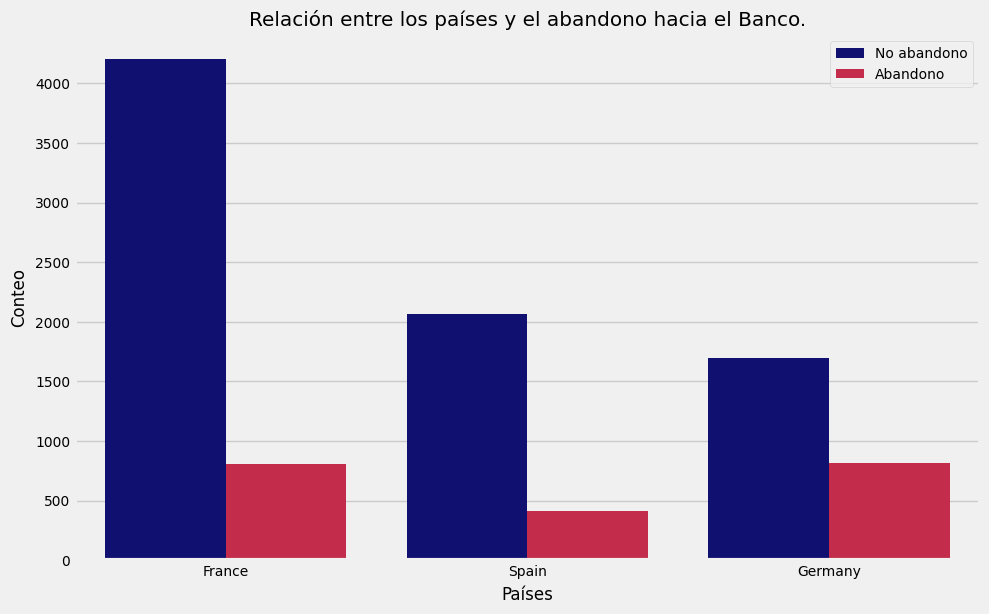

Geography,France,France,Germany,Germany,Spain,Spain
Exited,0.00,1.0,0.00,1.00,0.00,1.00
Porcentaje,42.04,8.1,16.95,8.14,20.64,4.13


In [31]:
# ¿Existe alguna diferencia en la propensión a abandonar el banco entre diferentes países?
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(10, 6))
    plt.rcParams.update({'font.size': 10})
    sns.countplot(data=df, x='Geography', hue='Exited', palette=['navy', 'crimson'])
    plt.xlabel('Países')
    plt.ylabel('Conteo')
    plt.legend(['No abandono', 'Abandono'])
    plt.tight_layout()
    plt.title('Relación entre los países y el abandono hacia el Banco.')
    plt.show()
    
result_3 = df.groupby('Geography')['Exited'].value_counts()/len(df)*100
result_df_3 = result_3.reset_index(name='Porcentaje')
result_df_3.set_index('Geography').T

- Podemos notar que si existe dicha propensión de abandonar el banco según el país donde en mayor medida se encontrará en Alemania y con una mínima de diferencia seguida por Francia

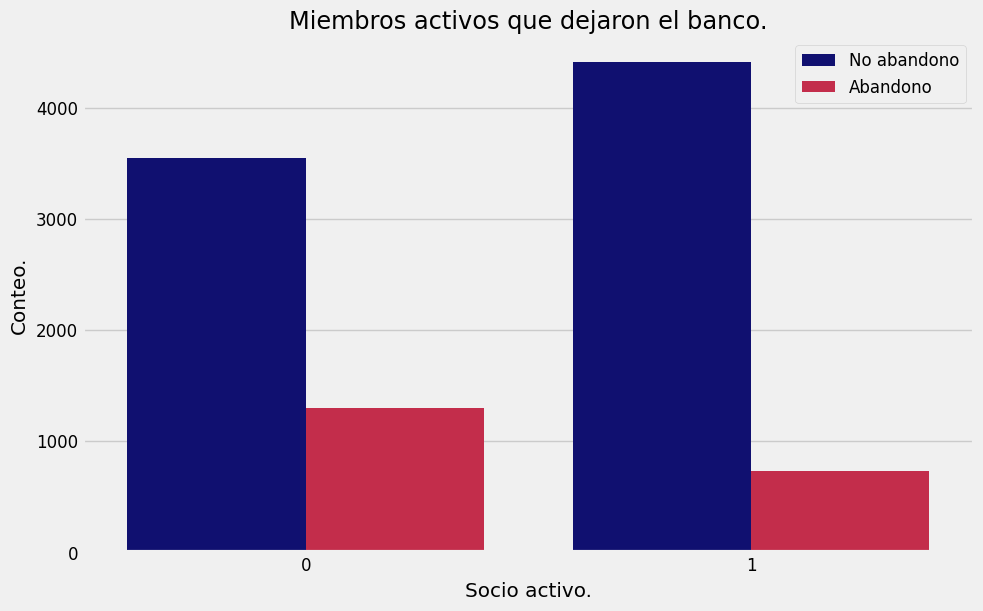

IsActiveMember,0,0,1,1
Exited,0.00,1.00,0.00,1.00
Porcentaje,35.47,13.02,44.16,7.35


In [32]:
# ¿Qué porcentaje de clientes que abandonaron el banco son miembros activos?
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(10, 6))
    plt.rcParams.update({'font.size': 12})
    sns.countplot(data=df, x='IsActiveMember', hue='Exited', palette=['navy', 'crimson'])
    plt.legend(['No abandono', 'Abandono'])
    plt.xlabel('Socio activo.')
    plt.ylabel('Conteo.')
    plt.tight_layout()
    plt.title('Miembros activos que dejaron el banco.')
    plt.show()
    
result_4 = df.groupby('IsActiveMember')['Exited'].value_counts()/len(df)*100
result_df_4 = result_4.reset_index(name='Porcentaje')
result_df_4.set_index('IsActiveMember').T

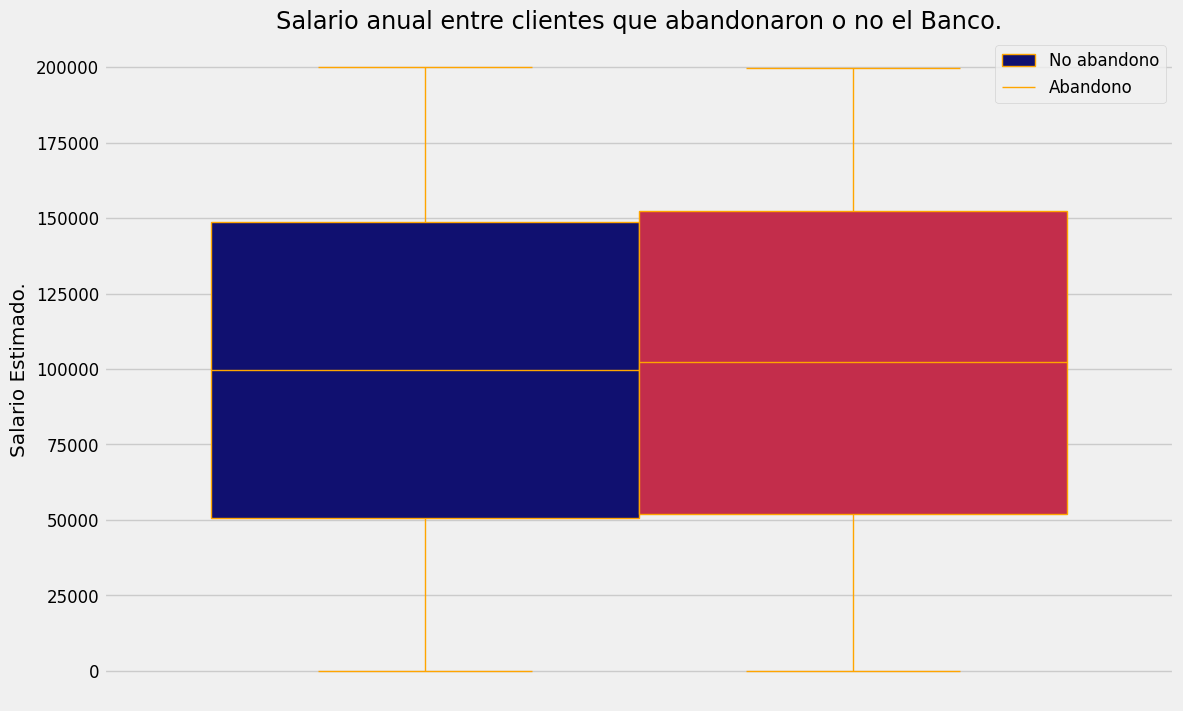

In [33]:
# ¿Cómo difiere la distribución de salarios estimados entre clientes que abandonaron y los que no lo hicieron?
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(12, 7))
    plt.rcParams.update({'font.size': 12})
    sns.boxplot(data=df, y='EstimatedSalary', hue='Exited', palette=['navy', 'crimson'], linecolor='orange')
    plt.legend(['No abandono', 'Abandono'])
    plt.ylabel('Salario Estimado.')
    plt.tight_layout()
    plt.title('Salario anual entre clientes que abandonaron o no el Banco.')
    plt.show()

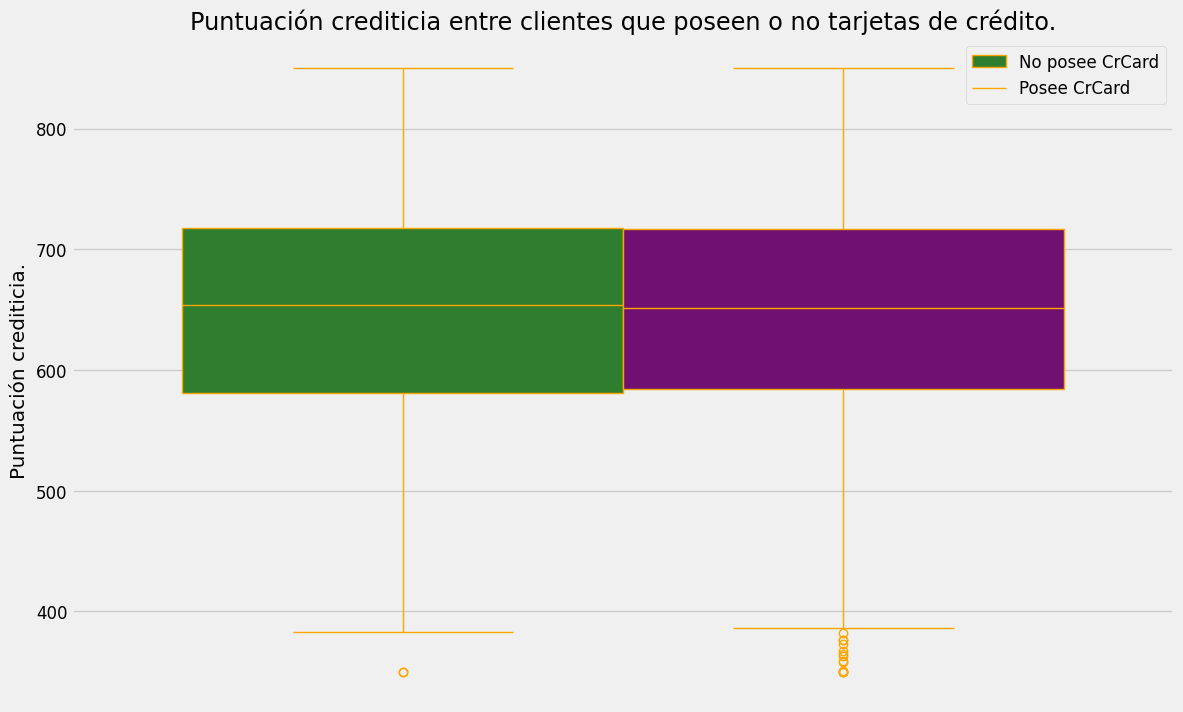

In [34]:
# ¿Cuál es la distribución de la puntuación crediticia entre clientes que tienen tarjeta de crédito y los que no la tienen?
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(12, 7))
    plt.rcParams.update({'font.size': 12})
    sns.boxplot(data=df, y='CreditScore', hue='HasCrCard', palette=['forestgreen', 'purple'], linecolor='orange')
    plt.legend(['No posee CrCard', 'Posee CrCard'])
    plt.ylabel('Puntuación crediticia.')
    plt.tight_layout()
    plt.title('Puntuación crediticia entre clientes que poseen o no tarjetas de crédito.')
    plt.show()

In [42]:
# df[(df['CreditScore'] <= 400) & (df['HasCrCard'] == 1)] # Justo todos los outliers son Exited 1 y no sería conveniente borrar datos que son los más importantes.

In [36]:
# ¿Qué porcentaje de clientes que tienen tarjeta de crédito han abandonado el banco?
result_5 = df.groupby('Exited')['HasCrCard'].value_counts()/len(df)*100 
result_df_5 = result_5.reset_index(name='Porcentaje')
result_df_5.set_index('HasCrCard').T

HasCrCard,1,0,1,0
Exited,0.00,0.00,1.00,1.00
Porcentaje,56.31,23.32,14.24,6.13


#### Análisis multivariante

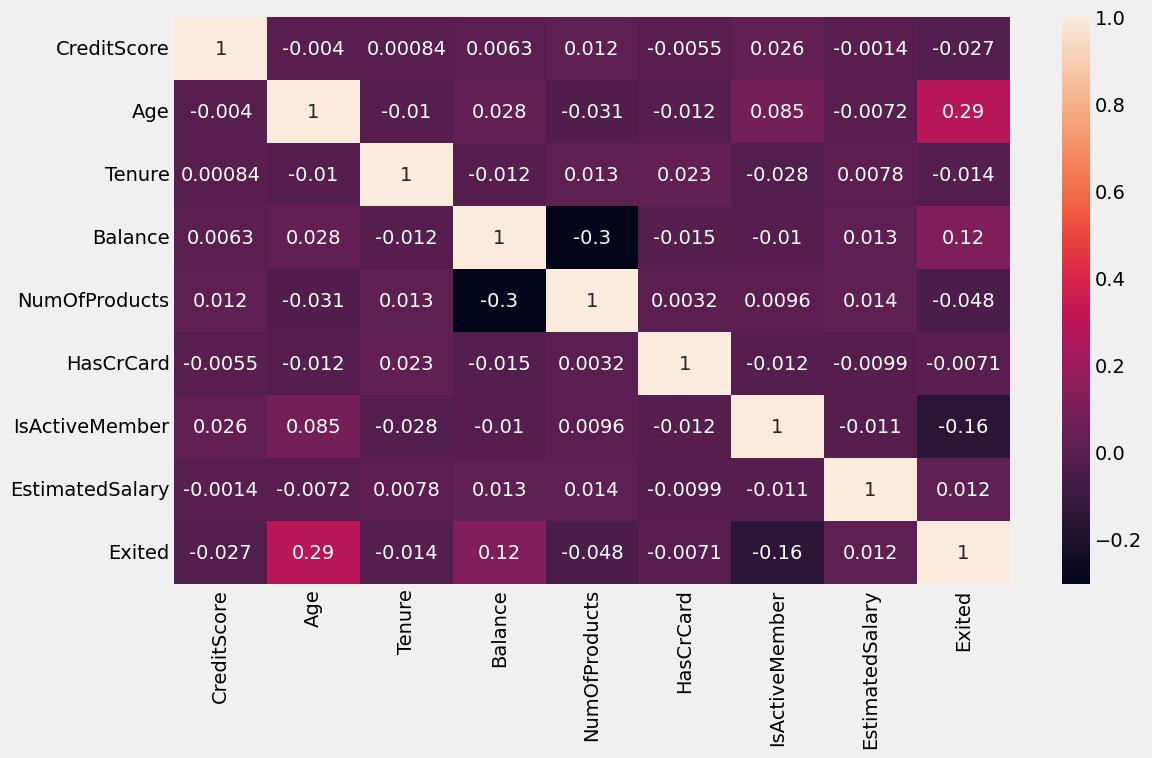

In [37]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(12,7))
    sns.heatmap(df.loc[:, 'CreditScore' : ].corr(numeric_only=True), annot=True)
    plt.show()

****** 

### HIPÓTESIS

##### **Relación entre la variable objetivo y las características demográficas:**

*Hipótesis: Existe una relación significativa entre la probabilidad de que un cliente abandone el banco (variable objetivo "Exited") y su ubicación geográfica.*

Geography  France  Germany  Spain
Exited                           
0            4204     1695   2064
1             810      814    413
Chi-cuadrado: 301.2553368243453
Valor p: 3.830317605354266e-66


<Figure size 1000x700 with 0 Axes>

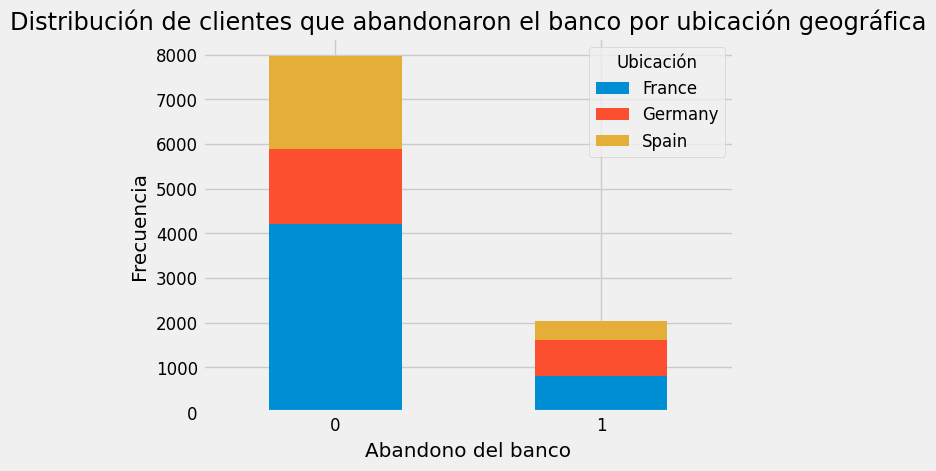

Rechazamos la hipótesis nula: Existe una relación significativa entre 'Exited' y 'Ubicacion'.


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Supongamos que tienes un dfFrame llamado 'data' que contiene la información relevante, 
# con una columna 'Exited' que indica si el cliente abandonó o no el banco, y una columna 'Ubicacion' que indica la ubicación geográfica.

# Calcular la tabla de contingencia entre 'Exited' y 'Ubicacion'
contingency_table = pd.crosstab(df['Exited'], df['Geography'])

# Visualizar la tabla de contingencia
print(contingency_table)

# Realizar la prueba de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-cuadrado:", chi2)
print("Valor p:", p)

# Visualizar la distribución de 'Exited' para cada ubicación geográfica
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(10,7))
    plt.rcParams.update({'font.size': 12})
    contingency_table.plot(kind='bar', stacked=True)
    plt.title('Distribución de clientes que abandonaron el banco por ubicación geográfica')
    plt.xlabel('Abandono del banco')
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.xticks(rotation=0)
    plt.legend(title='Ubicación')
    plt.show()
    
# Evaluar la hipótesis nula
alpha = 0.05
if p < alpha:
    print("Rechazamos la hipótesis nula: Existe una relación significativa entre 'Exited' y 'Ubicacion'.")
else:
    print("No rechazamos la hipótesis nula: No hay suficiente evidencia para concluir que hay una relación significativa entre 'Exited' y 'Ubicacion'.")

En resumen, los resultados sugieren que la probabilidad de que un cliente abandone el servicio varía considerablemente según el país en el que se encuentre. Esto implica que las estrategias de retención de clientes deben adaptarse específicamente a las características y necesidades de cada país. Es decir, una estrategia de retención efectiva en un país puede no ser tan exitosa en otro debido a las diferencias en los factores que influyen en la decisión de los clientes de abandonar el servicio. Por lo tanto, para reducir la fuga de clientes de manera efectiva, es crucial personalizar las estrategias de retención según la ubicación geográfica.

##### **Impacto de la puntuación crediticia y el saldo en la probabilidad de abandono:**

*Hipótesis: Los clientes con puntuaciones crediticias más bajas o saldos más altos tienen una mayor probabilidad de abandonar el banco.*

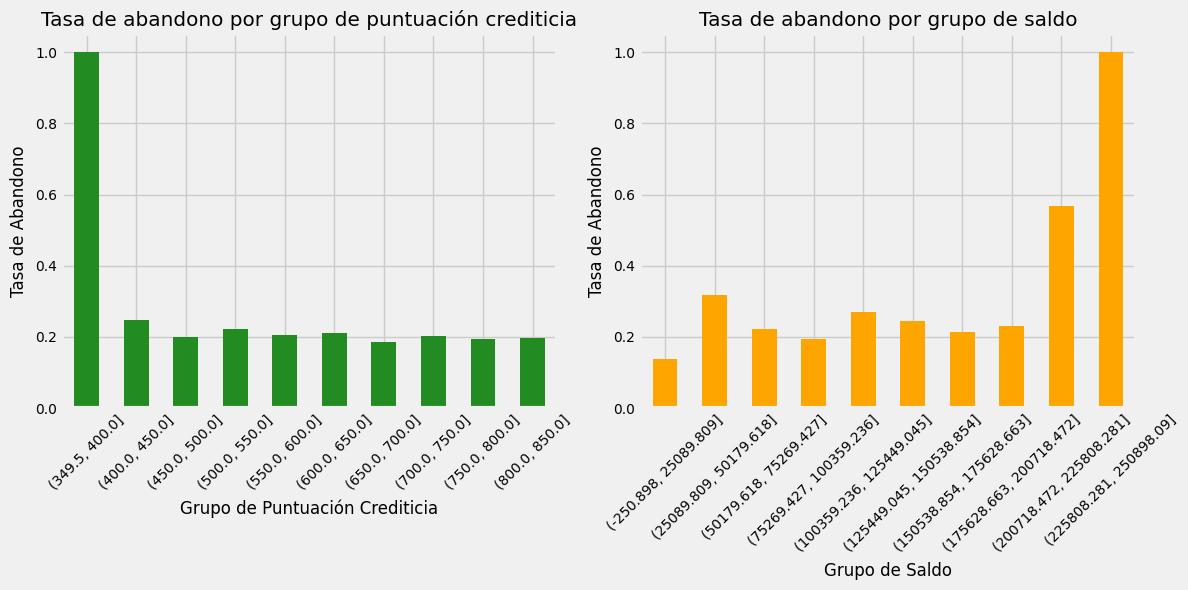

Correlación entre Puntuación Crediticia y Exited: -0.027093539754657777
Correlación entre Saldo y Exited: 0.11853276877163375 

                     Exited
CreditScore_group          
(349.5, 400.0]     1.000000
(400.0, 450.0]     0.247059
(450.0, 500.0]     0.200441
(500.0, 550.0]     0.220859
(550.0, 600.0]     0.205536
(600.0, 650.0]     0.209514
(650.0, 700.0]     0.185413
(700.0, 750.0]     0.201581
(750.0, 800.0]     0.195173
(800.0, 850.0]     0.196899 

                            Exited
Balance_group                     
(-250.898, 25089.809]     0.139111
(25089.809, 50179.618]    0.318841
(50179.618, 75269.427]    0.222222
(75269.427, 100359.236]   0.192668
(100359.236, 125449.045]  0.268621
(125449.045, 150538.854]  0.244991
(150538.854, 175628.663]  0.213992
(175628.663, 200718.472]  0.231183
(200718.472, 225808.281]  0.566667
(225808.281, 250898.09]   1.000000


In [39]:
# Dividir a los clientes en grupos según su puntuación crediticia y saldo
df['CreditScore_group'] = pd.cut(df['CreditScore'], bins=10)
df['Balance_group'] = pd.cut(df['Balance'], bins=10)

# Calcular la tasa de abandono por grupo de puntuación crediticia
credit_score_exit_rate = df.groupby('CreditScore_group')['Exited'].mean()

# Calcular la tasa de abandono por grupo de saldo
balance_exit_rate = df.groupby('Balance_group')['Exited'].mean()

# Calcular correlaciones
credit_score_corr = df['CreditScore'].corr(df['Exited'])
balance_corr = df['Balance'].corr(df['Exited'])

# Visualizar la distribución de 'Exited' para cada ubicación geográfica
with plt.style.context('fivethirtyeight'):
    # Visualizar los resultados
    plt.figure(figsize=(12, 6))
    plt.rcParams.update({'font.size': 10})
    # Gráfico de barras para la tasa de abandono por grupo de puntuación crediticia
    plt.subplot(1, 2, 1)
    credit_score_exit_rate.plot(kind='bar', color='forestgreen')
    plt.title('Tasa de abandono por grupo de puntuación crediticia')
    plt.xlabel('Grupo de Puntuación Crediticia')
    plt.ylabel('Tasa de Abandono')
    plt.xticks(rotation=45)

    # Gráfico de barras para la tasa de abandono por grupo de saldo
    plt.subplot(1, 2, 2)
    balance_exit_rate.plot(kind='bar', color='orange')
    plt.title('Tasa de abandono por grupo de saldo')
    plt.xlabel('Grupo de Saldo')
    plt.ylabel('Tasa de Abandono')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

# Imprimir correlaciones
print(f"Correlación entre Puntuación Crediticia y Exited: {credit_score_corr}")
print(f"Correlación entre Saldo y Exited: {balance_corr}", '\n')
print(pd.DataFrame(credit_score_exit_rate), '\n')
print(pd.DataFrame(balance_exit_rate))

Al analizar los resultados de nuestra segmentación por grupos, confirmamos que existe una relación entre el saldo en la cuenta de nuestros clientes y la probabilidad de abandono. Notamos que a medida que el saldo aumenta, los clientes son más propensos a abandonar nuestros servicios. Este hallazgo sugiere que los clientes con saldos más altos podrían requerir una atención especial y estrategias de retención para evitar su pérdida. Por otro lado, también observamos que los clientes con una puntuación crediticia más baja tienden a abandonar nuestros servicios con mayor frecuencia. Esta relación nos indica la importancia de ofrecer productos y servicios adaptados a las necesidades financieras y crediticias de nuestros clientes con puntuaciones más bajas, así como implementar medidas para mejorar su satisfacción y lealtad.

##### **Influencia de la actividad bancaria en la retención de clientes:**

Hipótesis: Los clientes que utilizan más productos bancarios (por ejemplo, mayor número de productos) tienen una menor probabilidad de abandonar el banco.

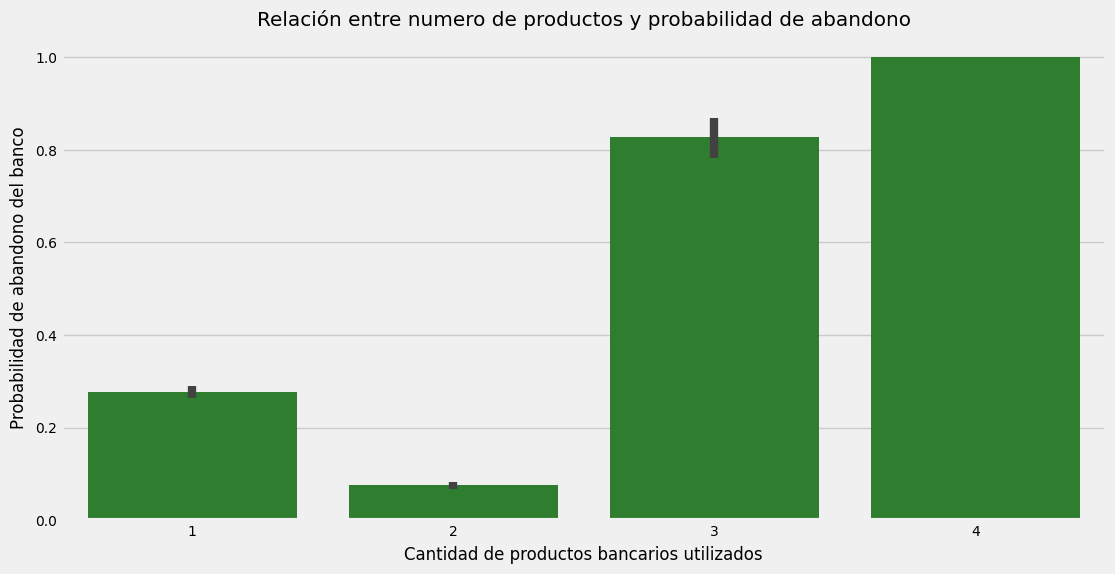

<Figure size 640x480 with 0 Axes>

In [40]:
# Visualizar la distribución de 'Exited' para cada ubicación geográfica
with plt.style.context('fivethirtyeight'):
    
    # Visualizar los resultados
    plt.figure(figsize=(12, 6))
    plt.rcParams.update({'font.size': 10})
    sns.barplot(data=df, x='NumOfProducts', y='Exited', color='forestgreen')
    plt.title('Relación entre numero de productos y probabilidad de abandono')
    plt.xlabel('Cantidad de productos bancarios utilizados')
    plt.ylabel('Probabilidad de abandono del banco')
    plt.show()

    plt.tight_layout()
    plt.show()


Nuestro análisis refuta la hipótesis de que los clientes que utilizan más productos bancarios tienen una menor probabilidad de abandonar el banco. Contrario a nuestra expectativa inicial, encontramos que los clientes que utilizan más productos bancarios tienden a mostrar una mayor probabilidad de abandono. Este hallazgo sugiere que simplemente aumentar la cantidad de productos bancarios utilizados por los clientes puede no ser suficiente para mejorar la retención y la satisfacción del cliente. 

*******



### Conclusiones:

1. **Relación entre la variable objetivo y las características demográficas:**
   - Descubrimos que la ubicación sí desempeña un papel importante en la retención de clientes. Por lo tanto, para reducir la fuga de clientes de manera efectiva, es crucial personalizar las estrategias de retención según la ubicación geográfica.

2. **Impacto de la puntuación crediticia y el saldo en la probabilidad de abandono:**
   - Confirmamos que tanto la puntuación crediticia como el saldo en la cuenta del cliente tienen una influencia significativa en la probabilidad de abandono del banco. Los clientes con puntuaciones crediticias más bajas y saldos más altos tienden a mostrar una mayor probabilidad de abandono. Estos hallazgos subrayan la importancia de la estabilidad financiera de los clientes como un factor clave en su lealtad hacia el banco.

3. **Influencia de la actividad bancaria en la retención de clientes:**
   - Nuestro análisis refuta la hipótesis de que los clientes que utilizan más productos bancarios tienen una menor probabilidad de abandonar el banco. Contrario a nuestra expectativa inicial, encontramos que los clientes que utilizan más productos bancarios tienden a mostrar una mayor probabilidad de abandono. En su lugar, es posible que sea necesario evaluar y mejorar la calidad y el valor percibido de los productos y servicios ofrecidos para garantizar una retención efectiva de los clientes.


<hr>
<div>
    <a href="./1-ancho_vs_largo.ipynb">
        <button>&#8592; Análisis exploratorio</button>
    </a>
    <a href="./MachineLearning.ipynb">
        <button style="float: right;"> Siguiente Notebook Machine Learning &#8594;</button>
    </a>
</div>
<hr>